In [1]:
import gym
from random import getrandbits
from bao_game.rl.model import build_model
from bao_game.rl.agents import RandomAgent, MinimaxRLAgent
from bao_game.envs.bao_utils import *
from tqdm import trange

## probability capped alpha beta-pruning minimax rl agent with fully connected dense-network estimator (30 epochs)

In [2]:
env = gym.make("Bao-v0")

model_path = 'F:/model_checkpoints/bao_game/test2/weights.30-3.89.hdf5'
model = build_model('test2')
model.load_weights(model_path)

C:\Users\L\AppData\Roaming\Python\Python37\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
rand = RandomAgent()
rl = MinimaxRLAgent(model, 0.0, min_prob=0.5, choose_highest_rated_move=True)  # very shallow search

wins_rand = 0
wins_rl = 0


with trange(1000) as t:
    for i in t:
        env.reset()
        first = getrandbits(1)
        if first == 1:
            current_agent = rl
            waiting_agent = rand
        else:
            current_agent = rand
            waiting_agent = rl

        while not env.done:
            env.step(current_agent.move(env.state, get_available_actions(state=env.state)))
            current_agent, waiting_agent = waiting_agent, current_agent
        if (first == 0 and env.outcome == 1) or (first == 1 and env.outcome == -1):
            wins_rl += 1
        t.set_description('Games: %i RL-Agent Wins: %i' % (i + 1, wins_rl))

print("RL-Agent Wins: " + str(wins_rl) + " (" + str(wins_rl / 10) + "%)")

Games: 1000 RL-Agent Wins: 1000: 100%|█████████████████████████████████████████████| 1000/1000 [29:01<00:00,  1.74s/it]

RL-Agent Wins: 1000 (100.0%)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## the agent with a lower probability cap playing against itself (the same statistics as the ones used in exploration, but n=1000)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [6:34:25<00:00, 23.67s/it]

Average number of moves: 127.385
Median number of moves: 143.0
Min number of moves: 9
Max number of moves: 441
Games with more than 150 moves: 203 (20.3%)
Games lost because of an empty front row: 988 (98.8%)


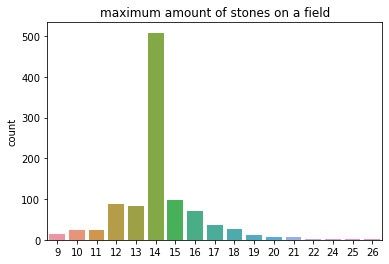

In [4]:
rl = MinimaxRLAgent(model, 0.0, min_prob=0.05, choose_highest_rated_move=True)

nb_moves = []
max_stones = []
nb_over150 = 0
empty_front_row = 0

for i in trange(1000):
    env.reset()
    n = 0
    game_max = 0
    while not env.done:
        n += 1
        action = rl.move(env.state, get_available_actions(env.state))
        env.step(action)
        max_nb = np.max(env.state)
        game_max = max(game_max, max_nb)
    if np.max(env.state[1]) == 0:
        empty_front_row += 1
    if n > 150:
        nb_over150 += 1
    nb_moves.append(n)
    max_stones.append(game_max)


moves = np.asarray(nb_moves)

print("Average number of moves: " + str(np.average(moves)))
print("Median number of moves: " + str(np.median(moves)))
print("Min number of moves: " + str(moves.min()))
print("Max number of moves: " + str(moves.max()))
print("Games with more than 150 moves: " + str(nb_over150) + " (" + str(nb_over150 / 10) + "%)")
print("Games lost because of an empty front row: " + str(empty_front_row) + " (" + str(empty_front_row / 10) + "%)")

max_stones_series = pd.Series(max_stones)
plt.title('maximum amount of stones on a field')
sns.countplot(max_stones_series)